In [5]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from sklearn import mixture

In [57]:
df = pd.read_csv("IQR_A.csv")
xf = np.array(df.loc["x_f":"y_f"][0:1500])
train = np.array(xf[:-10])
test=np.array(xf[-10:])

In [22]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_type = ['spherical', 'tied', 'diag', 'full']

In [25]:
# for n_components in n_components_range:
#         # Fit a Gaussian mixture with EM
#         gmm = mixture.GaussianMixture(n_components=n_components,
#                                       covariance_type=cv_type)
#         gmm.fit(xf)
#         bic.append(gmm.bic(xf))
#         if bic[-1] < lowest_bic:
#             lowest_bic = bic[-1]
#             best_gmm = gmm

In [29]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score

In [30]:
class GMM:
    def __init__(self,Data,K,weights = None,means = None,covars = None):
        """
        这是GMM（高斯混合模型）类的构造函数
        :param Data: 训练数据
        :param K: 高斯分布的个数
        :param weigths: 每个高斯分布的初始概率（权重）
        :param means: 高斯分布的均值向量
        :param covars: 高斯分布的协方差矩阵集合
        """
        self.Data = Data
        self.K = K
        if weights is not None:
            self.weights = weights
        else:
            self.weights  = np.random.rand(self.K)
            self.weights /= np.sum(self.weights)        # 归一化
        col = np.shape(self.Data)[1]
        if means is not None:
            self.means = means
        else:
            self.means = []
            for i in range(self.K):
                mean = np.random.rand(col)
                #mean = mean / np.sum(mean)        # 归一化
                self.means.append(mean)
        if covars is not None:
            self.covars = covars
        else:
            self.covars  = []
            for i in range(self.K):
                cov = np.random.rand(col,col)
                #cov = cov / np.sum(cov)                    # 归一化
                self.covars.append(cov)  


In [35]:
def GMM_EM(self):
        """
        这是利用EM算法进行优化GMM参数的函数
        :return: 返回各组数据的属于每个分类的概率
        """
        loglikelyhood = 0
        oldloglikelyhood = 1
        len,dim = np.shape(self.Data)
        # gamma表示第n个样本属于第k个混合高斯的概率
        gammas = [np.zeros(self.K) for i in range(len)]
        while np.abs(loglikelyhood-oldloglikelyhood) > 0.00000001:
            oldloglikelyhood = loglikelyhood
            # E-step
            for n in range(len):
                # respons是GMM的EM算法中的权重w，即后验概率
                respons = [self.weights[k] * self.Gaussian(self.Data[n], self.means[k], self.covars[k])
                                                    for k in range(self.K)]
                respons = np.array(respons)
                sum_respons = np.sum(respons)
                gammas[n] = respons/sum_respons
            # M-step
            for k in range(self.K):
                #nk表示N个样本中有多少属于第k个高斯
                nk = np.sum([gammas[n][k] for n in range(len)])
                # 更新每个高斯分布的概率
                self.weights[k] = 1.0 * nk / len
                # 更新高斯分布的均值
                self.means[k] = (1.0/nk) * np.sum([gammas[n][k] * self.Data[n] for n in range(len)], axis=0)
                xdiffs = self.Data - self.means[k]
                # 更新高斯分布的协方差矩阵
                self.covars[k] = (1.0/nk)*np.sum([gammas[n][k]*xdiffs[n].reshape((dim,1)).dot(xdiffs[n].reshape((1,dim))) for n in range(len)],axis=0)
            loglikelyhood = []
            for n in range(len):
                tmp = [np.sum(self.weights[k]*self.Gaussian(self.Data[n],self.means[k],self.covars[k])) for k in range(self.K)]
                tmp = np.log(np.array(tmp))
                loglikelyhood.append(list(tmp))
            loglikelyhood = np.sum(loglikelyhood)
        for i in range(len):
            gammas[i] = gammas[i]/np.sum(gammas[i])
        self.posibility = gammas
        self.prediction = [np.argmax(gammas[i]) for i in range(len)]

In [36]:
def run_main():
    """
        这是主函数
    """
    # 导入Iris数据集
    iris = load_iris()
    label = np.array(iris.target)
    data = np.array(iris.data)
    print("Iris数据集的标签：\n",label)

    # 对数据进行预处理
    data = Normalizer().fit_transform(data)

    # 解决画图是的中文乱码问题
    mpl.rcParams['font.sans-serif'] = [u'simHei']
    mpl.rcParams['axes.unicode_minus'] = False

    # 数据可视化
    plt.scatter(data[:,0],data[:,1],c = label)
    plt.title("Iris数据集显示")
    plt.show()

    # GMM模型
    K = 3
    gmm = GMM(data,K)
    gmm.GMM_EM()
    y_pre = gmm.prediction
    print("GMM预测结果：\n",y_pre)
    print("GMM正确率为：\n",accuracy_score(label,y_pre))
    plt.scatter(data[:, 0], data[:, 1], c=y_pre)
    plt.title("GMM结果显示")
    plt.show()


Iris数据集的标签：
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


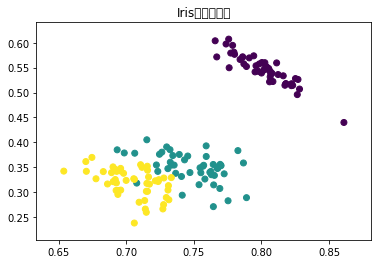

AttributeError: 'GMM' object has no attribute 'GMM_EM'

In [40]:
if __name__ == '__main__':
    run_main()

In [41]:
from sklearn import mixture
import matplotlib.pyplot as plt
import numpy as np

In [42]:
def test_GMM(dataMat, components=3,iter = 100,cov_type="full"):
    clst = mixture.GaussianMixture(n_components=n_components,max_iter=iter,covariance_type=cov_type)
    clst.fit(dataMat)
    predicted_labels =clst.predict(dataMat)
    return clst.means_,predicted_labels 


In [53]:
test_GMM(xf)

(array([[30.51485873]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

In [54]:
def showCluster(dataMat, k, centroids, clusterAssment):
    numSamples, dim = dataMat.shape
    if dim != 2:
        print("Sorry! I can not draw because the dimension of your data is not 2!")
        return 1

    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
    if k > len(mark):
        print("Sorry! Your k is too large!")
        return 1

        # draw all samples
    for i in range(numSamples):
        markIndex = int(clusterAssment[i])
        plt.plot(dataMat[i, 0], dataMat[i, 1], mark[markIndex])

    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']
    # draw the centroids
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize=12)

    plt.show()

In [58]:
if __name__=="__main__":
    dataMat = np.mat(xf)
    n_components = 3
    iter=100
    cov_types = ['spherical', 'tied', 'diag', 'full']
    centroids,labels = test_GMM(dataMat,n_components,iter,cov_types[3])
    showCluster(dataMat, n_components, centroids, labels)  # 这里labels维度改变了，注意修改showCluster方法

ValueError: Found array with 0 sample(s) (shape=(0, 8)) while a minimum of 1 is required.